In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random, math

In [167]:
"""
Initialize some parameters
"""
dataNum = 100
# set range of the dataset
dataRange = [-0.5, 0.5]
figRange = (dataRange[0], dataRange[1])
# dimension of the dataset
dimension = 2
# weight of the target function
fw = [random.randint(1, 10) for num in range(0, dimension)]

In [168]:
def generate_dataset():
    """
    Generate dataset:
        genarate dataset D by the defined target function f
        dimention = 2
    """
    f = lambda x1,x2: x1*fw[0] + x2*fw[1]
    data_x1 = [random.uniform(dataRange[0], dataRange[1]) for num in range(0, dataNum)]
    data_x2 = [random.uniform(dataRange[0], dataRange[1]) for num in range(0, dataNum)]
    data_y = [f(data_x1[i], data_x2[i]) for i in range(0, dataNum)]
    data_y = np.sign(data_y)
    dataset = pd.DataFrame({'x1': data_x1, 'x2': data_x2, 'y': data_y})
    return dataset

In [169]:
def drawFig(D, g, w_new, mistakeIndex, figTitle):
  """
  Initialize the figure to plot
  """
  fig = plt.figure(figsize = (6,6))
  fig.suptitle(figTitle)
  ax = fig.add_subplot(111)
  ax.set_xlim(figRange)
  ax.set_ylim(figRange)

  """
  Scatter the point in D
  """
  maskPos = (D['y'] == 1)
  maskNeg = (D['y'] == -1)

  ax.scatter(D.x1[maskPos], D.x2[maskPos], marker = 'o', s = 100)
  ax.scatter(D.x1[maskNeg], D.x2[maskNeg], marker = 'x', s = 100)

  """
  Plot the perceptron
  """
  p = np.linspace(dataRange[0], dataRange[1])
  ax.plot(p, (-g[0]*p)/g[1], label = 'perceptron' , color = 'red')

  """
  Plot the w_t and w_t+1
  """
  if figTitle != 'Dataset and target function' and figTitle != 'Iteration_Final':
    ax.plot([0, g[0]], [0, g[1]], label = 'w_t', color = 'pink')
    ax.plot([0, w_new[0]], [0, w_new[1]], label = 'w_t+1', color = 'green')
    if D.y[mistakeIndex] == 1:
      ax.scatter(D.x1[mistakeIndex], D.x2[mistakeIndex], marker = 'o', color = 'purple', s = 200, label = 'mistake')
    else:
      ax.scatter(D.x1[mistakeIndex], D.x2[mistakeIndex], marker = 'x', color = 'purple', s = 200, label = 'mistake')

  plt.legend()
  plt.show()

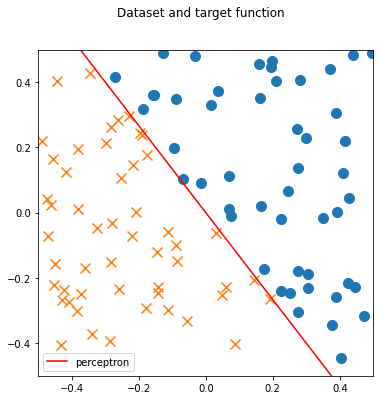

In [170]:
dataset = generate_dataset()
drawFig(dataset, fw, [0, 0], -1, 'Dataset and target function')

In [171]:
def Naive_PLA(D):
  """
  How Naive PLA works:
      1. initialize weight w_0
      2. find mistake
      3. if no mistake, end of PLA loop
      4. correct w_t to calculate w_{t+1}
      5. back to step 2
  """
  w = [random.uniform(0, 1) for num in range(0, dimension)]
  count = 0
  while True:
    # update g depend on the updated w, then find the mistakes
    g = lambda x1, x2: w[0]*x1 + w[1]*x2
    y_t = np.sign(g(D.x1, D.x2))

    # find the mistakes--> test if g will cause the mistake or not
    mask = y_t != D.y
    if np.sum(mask) == 0:
      drawFig(D, w, [0,0], -1, 'Iteration_Final')
      break
    # index for the mistake
    maskIndex = np.where(mask == True)
    # randomly select one for correction
    mistakeIndex = np.random.choice(maskIndex[0] ,1)[0]

    # mistake found, updated the w with correction procedure
    w_new = w
    w_new = [w[i] + D.y[mistakeIndex]*D.iloc[mistakeIndex, i] for i in range(0, dimension)]

    drawFig(D, w, w_new, mistakeIndex, 'Iteration'+str(count))
    w = w_new
    count+=1

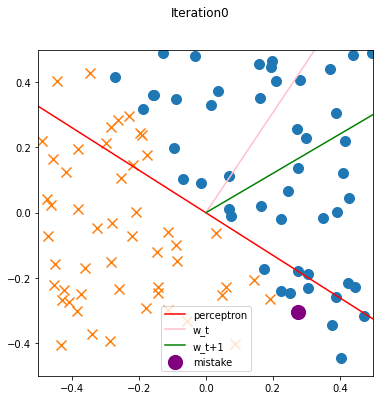

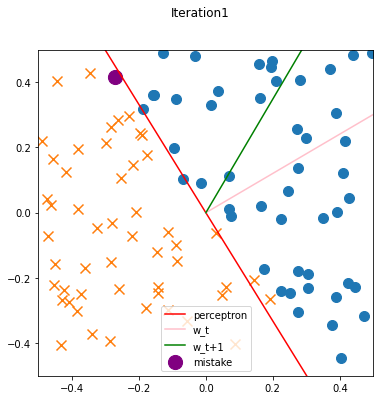

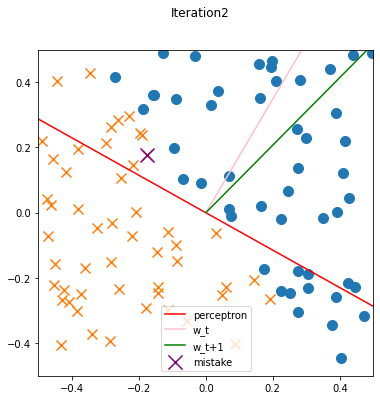

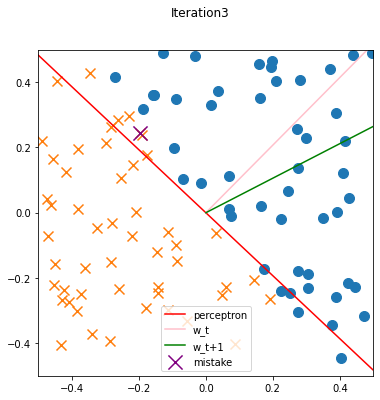

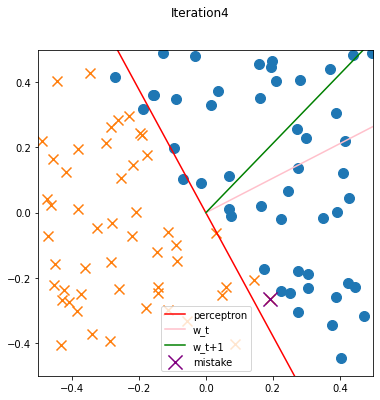

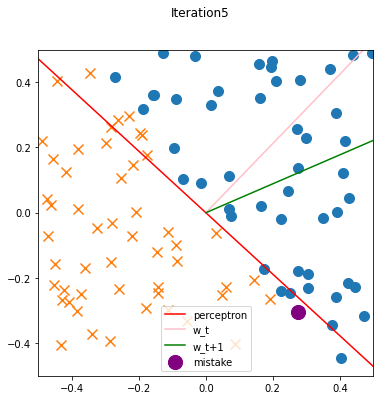

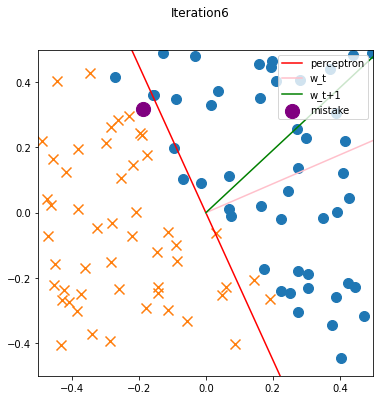

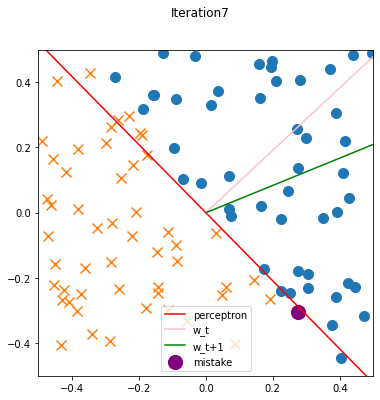

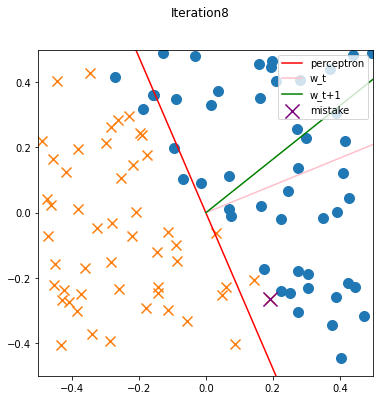

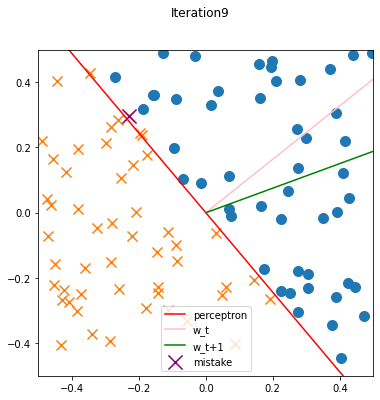

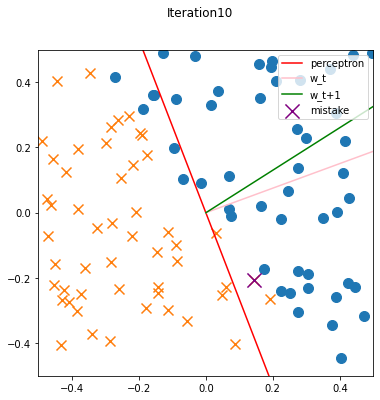

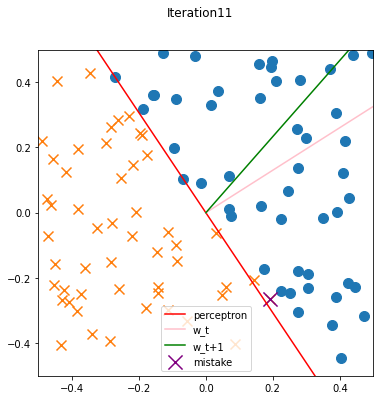

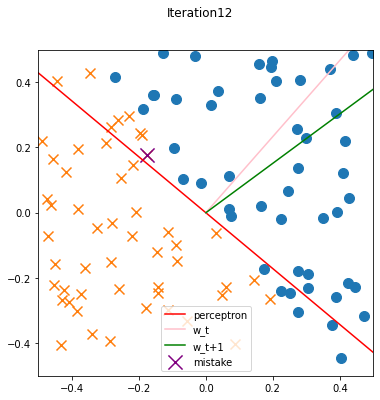

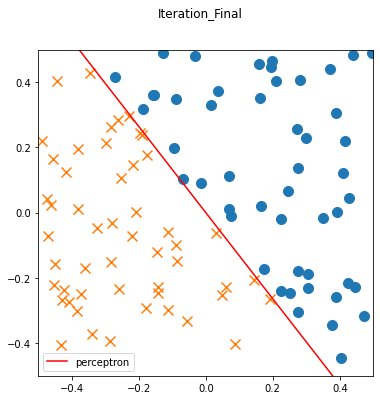

In [172]:
Naive_PLA(dataset)